In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
with open("traffic-signs-data/train.p", mode='rb') as training_data:
    train=pickle.load(training_data)
with open("traffic-signs-data/valid.p", mode='rb') as validation_data:
    val=pickle.load(validation_data)
with open("traffic-signs-data/test.p", mode='rb') as testing_data:
    test=pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = val['features'], val['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
X_validation.shape

(4410, 32, 32, 3)

In [6]:
X_test.shape

(12630, 32, 32, 3)

36


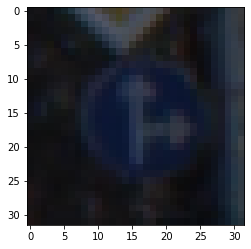

In [65]:
i = 1000
plt.imshow(X_train[i])
print(y_train[i])

41

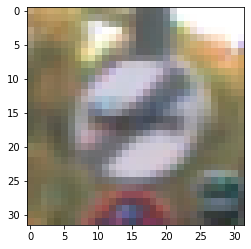

In [66]:
i = 100
plt.imshow(X_train[i])
y_train[i]

In [7]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train,y_train)

In [8]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)




In [79]:
X_train_gray.shape

(34799, 32, 32, 1)

In [9]:
X_train_gray_norm = (X_train_gray-128)/128
X_validation_gray_norm = (X_validation_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128

In [10]:
X_train

array([[[[127, 151, 195],
         [125, 150, 195],
         [127, 152, 195],
         ...,
         [131, 153, 199],
         [131, 154, 200],
         [132, 155, 200]],

        [[128, 150, 195],
         [127, 150, 197],
         [127, 150, 194],
         ...,
         [126, 134, 160],
         [130, 153, 195],
         [129, 154, 199]],

        [[127, 148, 193],
         [128, 149, 193],
         [128, 150, 192],
         ...,
         [110,  99, 114],
         [130, 149, 180],
         [130, 154, 197]],

        ...,

        [[ 44,  42,  42],
         [ 46,  45,  44],
         [ 49,  47,  47],
         ...,
         [ 52,  54,  57],
         [ 49,  48,  54],
         [ 50,  49,  53]],

        [[ 43,  42,  43],
         [ 45,  43,  43],
         [ 47,  45,  45],
         ...,
         [ 53,  55,  59],
         [ 45,  45,  50],
         [ 45,  44,  45]],

        [[ 40,  39,  40],
         [ 39,  38,  39],
         [ 45,  42,  42],
         ...,
         [ 52,  54,  58],
        

In [11]:
X_train_gray_norm.shape

(34799, 32, 32, 1)

<Figure size 432x288 with 0 Axes>

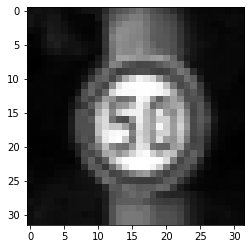

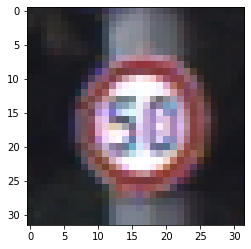

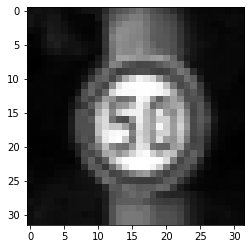

<Figure size 432x288 with 0 Axes>

In [12]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')
plt.figure()

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout, Dense
from keras.optimizers import Adam
from keras.callbacks import TensorBoard



In [15]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))


In [17]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [19]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        nb_epoch=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

<ipython-input-19-88d0c0922347>:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  history = cnn_model.fit(X_train_gray_norm,


Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 3s 78us/step - loss: 3.1519 - accuracy: 0.1825 - val_loss: 2.7483 - val_accuracy: 0.2961
Epoch 2/50
34799/34799 [==============================] - 2s 71us/step - loss: 1.7987 - accuracy: 0.5117 - val_loss: 1.4293 - val_accuracy: 0.5905
Epoch 3/50
34799/34799 [==============================] - 2s 70us/step - loss: 0.9554 - accuracy: 0.7326 - val_loss: 1.0333 - val_accuracy: 0.7007
Epoch 4/50
34799/34799 [==============================] - 2s 70us/step - loss: 0.6767 - accuracy: 0.8127 - val_loss: 0.8639 - val_accuracy: 0.7438
Epoch 5/50
34799/34799 [==============================] - 3s 75us/step - loss: 0.5313 - accuracy: 0.8549 - val_loss: 0.7754 - val_accuracy: 0.7673
Epoch 6/50
34799/34799 [==============================] - 2s 69us/step - loss: 0.4469 - accuracy: 0.8800 - val_loss: 0.7400 - val_accuracy: 0.7780
Epoch 7/50
34799/34799 [==============================] - 2s 69us/ste

In [20]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

No handles with labels found to put in legend.


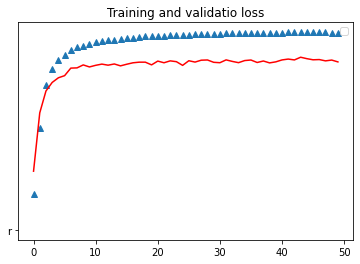

In [36]:
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
loss = history.history['loss']
val_loss= history.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs,acc,"^",'r')
plt.plot(epochs,acc_val,'r')

plt.title('Training and validatio loss')
plt.legend()
plt.show()

No handles with labels found to put in legend.


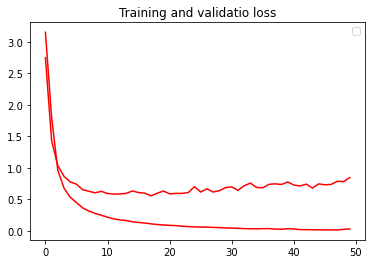

In [35]:
epochs=range(len(acc))
plt.plot(epochs,loss,'r')
plt.plot(epochs,val_loss,'r')

plt.title('Training and validatio loss')
plt.legend()
plt.show()